# **Strava EDA Project**
Project Name - Strava EDA Analysis

Name - Srijit Das

# **Project Summary**
Strava, Inc. is a U.S.-based company that operates a popular fitness tracking and social networking app primarily for cyclists and runners. Founded in 2009 by Mark Gainey and Michael Horvath, Strava allows users to record physical activities using GPS data, analyze performance metrics, and share workouts with a community of athletes. The platform supports various sports and integrates with many fitness devices. Strava is known for features like segments, leaderboards, and challenges, promoting competition and motivation. The company is headquartered in San Francisco, California.

# **GitHub link**
My github -

# **Problem Statement**
**We have multiple datasets to study the activities of a person using strava, we have to merge all the datasets into one and analyse the dataset using EDA and give solutions for the business problems ?**

Define Your Business Objective? The business objective for Strava datasets are as follows-

To analyze the dataset and find the new trends which attracts more customers to download the app. To analyze the dataset and find how to attract the users to use subsciption model. To analyze the dataset and find the insights for the activities and analyse the behaviour and pattern based on it. To analyze the dataset and find the choices and feedback of customers while using the app.

# Import **Libraries**

In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import missingno as ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import random
from wordcloud import WordCloud
import ast
from PIL import Image
import IPython.display as display
import statsmodels as stat
import geopandas as geo

# **Dataset Loading**

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Load Dataset
dataset1 = pd.read_csv("/content/drive/MyDrive/2. internship works/Labmentix /Strava/Data sets/dailyActivity_merged.csv")
dataset2 = pd.read_csv("/content/drive/MyDrive/2. internship works/Labmentix /Strava/Data sets/dailyCalories_merged.csv")
dataset3 = pd.read_csv("/content/drive/MyDrive/2. internship works/Labmentix /Strava/Data sets/dailyIntensities_merged.csv")
dataset4 = pd.read_csv("/content/drive/MyDrive/2. internship works/Labmentix /Strava/Data sets/dailySteps_merged.csv")
dataset5 = pd.read_csv("/content/drive/MyDrive/2. internship works/Labmentix /Strava/Data sets/sleepDay_merged.csv")
dataset6 = pd.read_csv("/content/drive/MyDrive/2. internship works/Labmentix /Strava/Data sets/weightLogInfo_merged.csv")

# **Datasets Merged**

In [38]:
import pandas as pd
from functools import reduce

# List of your datasets
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

# Define possible date column names to check in each dataset
date_cols_options = ['ActivityDate', 'ActivityDay', 'SleepDay', 'Date']

# Find date column in each dataset
def find_date_col(df):
    for col in date_cols_options:
        if col in df.columns:
            return col
    return None

# Prepare list of (df, date_col) tuples
dfs_with_date_col = [(df, find_date_col(df)) for df in datasets]

# Start merging
md = dfs_with_date_col[0][0]  # first dataframe

for df, date_col in dfs_with_date_col[1:]:
    if date_col is None:
        # No date column found, merge only on 'Id'
        md = pd.merge(md, df, on='Id', how='outer')
    else:
        # Merge on 'Id' and the date column (date columns might have different names)
        md = pd.merge(md, df, left_on=['Id', 'ActivityDate'] if 'ActivityDate' in md.columns else ['Id'],
                      right_on=['Id', date_col] if date_col else ['Id'],
                      how='outer')

# **Dataset First View**

In [39]:
# Dataset First Look
md.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/12/2016,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/13/2016,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/14/2016,10460.0,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/15/2016,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/16/2016,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
md.tail(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
1415,8877689391,5/7/2016,12332.0,8.13,8.13,0.0,0.08,0.96,6.99,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,8877689391,5/8/2016,10686.0,8.11,8.11,0.0,1.08,0.20,6.80,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,8877689391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
1418,8877689391,5/9/2016,20226.0,18.25,18.25,0.0,11.10,0.80,6.24,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1419,8877689391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1.462776e+12


# **Dataset Rows & Columns count**

In [41]:
# Dataset Rows & Columns count
md.shape

(1420, 39)

# **Dataset Information**

In [42]:
# Dataset Info
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          1420 non-null   int64  
 1   ActivityDate                940 non-null    object 
 2   TotalSteps                  940 non-null    float64
 3   TotalDistance               940 non-null    float64
 4   TrackerDistance             940 non-null    float64
 5   LoggedActivitiesDistance    940 non-null    float64
 6   VeryActiveDistance_x        940 non-null    float64
 7   ModeratelyActiveDistance_x  940 non-null    float64
 8   LightActiveDistance_x       940 non-null    float64
 9   SedentaryActiveDistance_x   940 non-null    float64
 10  VeryActiveMinutes_x         940 non-null    float64
 11  FairlyActiveMinutes_x       940 non-null    float64
 12  LightlyActiveMinutes_x      940 non-null    float64
 13  SedentaryMinutes_x          940 n

# **Duplicate Values**

In [43]:
# Dataset Duplicate Value Count
duplicates = md.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    1414
True        6
Name: count, dtype: int64


# **Removing Duplicates**

In [44]:
md.drop_duplicates(["Id"],keep='first',inplace=True)

# **Missing Values/Null Values**

In [45]:
# Missing Values/Null Values Count
md.isnull().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance_x,0
ModeratelyActiveDistance_x,0
LightActiveDistance_x,0
SedentaryActiveDistance_x,0


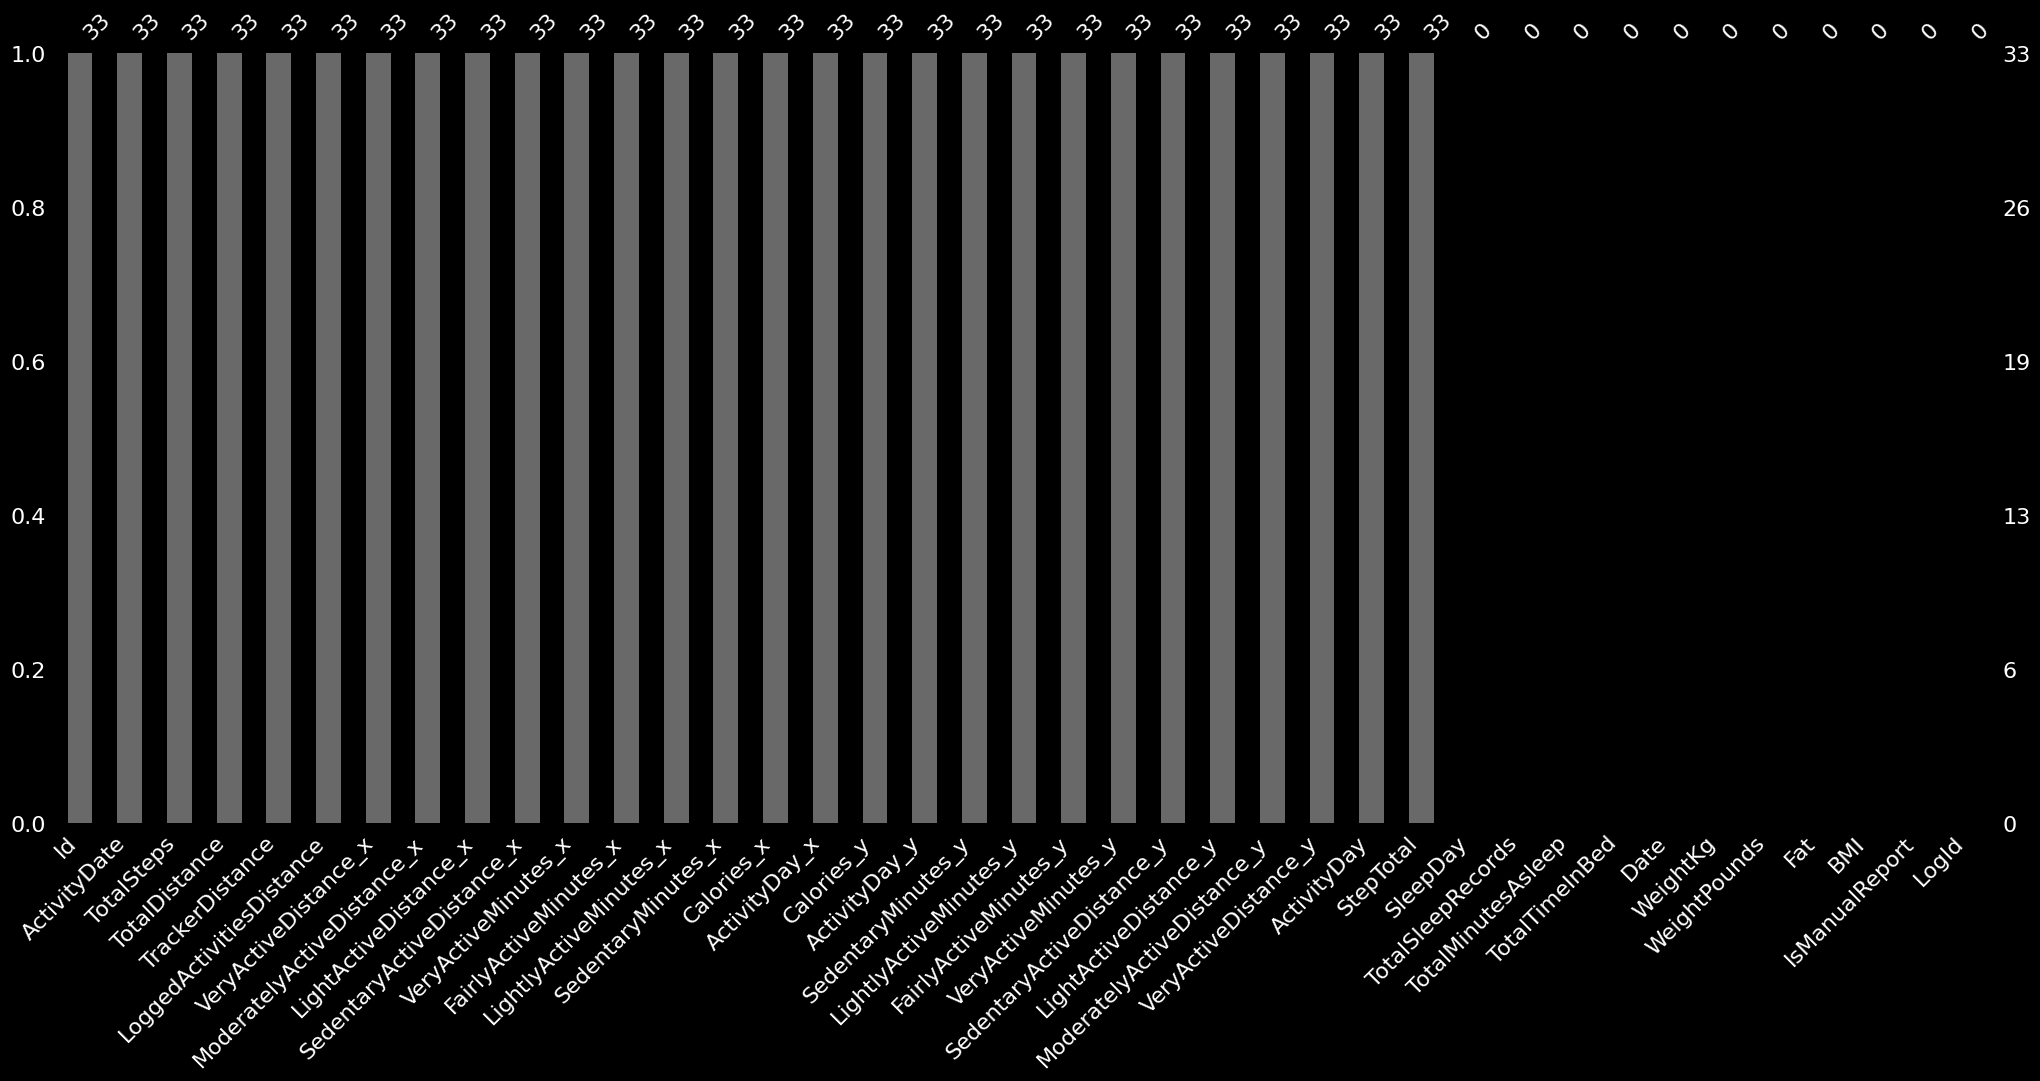

In [46]:
# Visualizing the missing values
ms.bar(md)
plt.show()

**What did you know about your dataset?**

The Following things which are about the dataset:-

There are 1414 rows and 6 duplicate rows.
There are 39 columns.

# **2. Understanding Your Variables**

In [47]:
# Dataset Columns
md.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance_x',
       'ModeratelyActiveDistance_x', 'LightActiveDistance_x',
       'SedentaryActiveDistance_x', 'VeryActiveMinutes_x',
       'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'SedentaryMinutes_x',
       'Calories_x', 'ActivityDay_x', 'Calories_y', 'ActivityDay_y',
       'SedentaryMinutes_y', 'LightlyActiveMinutes_y', 'FairlyActiveMinutes_y',
       'VeryActiveMinutes_y', 'SedentaryActiveDistance_y',
       'LightActiveDistance_y', 'ModeratelyActiveDistance_y',
       'VeryActiveDistance_y', 'ActivityDay', 'StepTotal', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Date',
       'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId'],
      dtype='object')

In [48]:
# Dataset Describe
md.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,VeryActiveMinutes_x,...,VeryActiveDistance_y,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,LogId
count,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,...,33.000000,33.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.857201e+09,8236.848485,5.982727,5.958182,0.215844,1.826364,0.346061,3.41000,0.000303,22.303030,...,1.826364,8236.848485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.433765e+09,4873.667582,3.961760,3.936669,0.922865,3.105690,0.471420,2.06639,0.001741,31.597552,...,3.105690,4873.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.347168e+09,5014.000000,3.450000,3.450000,0.000000,0.000000,0.000000,2.10000,0.000000,0.000000,...,0.000000,5014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.445115e+09,8163.000000,5.980000,5.980000,0.000000,0.140000,0.240000,3.45000,0.000000,2.000000,...,0.140000,8163.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.962181e+09,10694.000000,7.570000,7.570000,0.000000,3.060000,0.550000,5.31000,0.000000,42.000000,...,3.060000,10694.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.877689e+09,23186.000000,20.400000,20.400000,4.869783,12.220000,2.300000,7.82000,0.010000,116.000000,...,12.220000,23186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Variables Description**
The following is the description for the variables:-

Columns----------------------------------Description

Id----------------------------------Unique ID.

ActivityDate----------------------------------Date of the activity.

TotalSteps----------------------------------Total Steps done by the user.

TotalDistance----------------------------------Total Distance covered by the user.

TrackerDistance----------------------------------Tracked Distance by the user.

LoggedActivitiesDistance----------------------------------Logged activity distance on the app.

VeryActiveDistance_x----------------------------------X coordinatinate for very active distance.

ModeratelyActiveDistance_x----------------------------------X coordinatinate for moderate active distance.

LightActiveDistance_x----------------------------------X coordinatinate for light active distance.

SedentaryActiveDistance_x----------------------------------X coordinatinate for Sedentary active distance.

VeryActiveMinutes_x----------------------------------X coordinatinate for very active minutes.

FairlyActiveMinutes_x----------------------------------X coordinatinate for fairly active minutes.

LightlyActiveMinutes_x----------------------------------X coordinatinate for light active minutes.

SedentaryMinutes_x----------------------------------X coordinatinate for Sedentary active minutes.

Calories_x----------------------------------X coordinatinate for calories.

ActivityDay_x----------------------------------X coordinatinate for activity date.

Calories_y----------------------------------y coordinatinate for calories.

ActivityDay_y----------------------------------y coordinatinate for activity date.

SedentaryMinutes_y----------------------------------y coordinatinate for Sedentary active minutes.

LightlyActiveMinutes_y----------------------------------y coordinatinate for light active minutes.

FairlyActiveMinutes_y----------------------------------y coordinatinate for fairly active minutes.

VeryActiveMinutes_y----------------------------------y coordinatinate for very active minutes.

SedentaryActiveDistance_y----------------------------------y coordinatinate for Sedentary active distance.

LightActiveDistance_y----------------------------------y coordinatinate for light active distance.

ModeratelyActiveDistance_y----------------------------------y coordinatinate for moderate active distance.

VeryActiveDistance_y----------------------------------y coordinatinate for very active distance.

ActivityDay----------------------------------Day of the activity.

StepTotal----------------------------------Step count.

SleepDay----------------------------------Total sleep count.

TotalSleepRecords----------------------------------Sleep record for user.

TotalMinutesAsleep----------------------------------Total minutes the user was asleep.

TotalTimeInBed----------------------------------Total time user was in bed.

Date----------------------------------Date of record.

WeightKg----------------------------------Weight of user in KG's.

WeightPounds----------------------------------Weight of user in Pounds.

Fat----------------------------------Fat percentage of user.

BMI----------------------------------Body mass index of user.

IsManualReport----------------------------------Manual report of user.

LogId----------------------------------Login ID for the user.

# **Check Unique Values for each variable.**

In [49]:
# Check Unique Values for each variable.
for x in md.columns:
    print(f"{x} - {md[x].nunique()}")

Id - 33
ActivityDate - 1
TotalSteps - 32
TotalDistance - 32
TrackerDistance - 32
LoggedActivitiesDistance - 3
VeryActiveDistance_x - 19
ModeratelyActiveDistance_x - 19
LightActiveDistance_x - 27
SedentaryActiveDistance_x - 2
VeryActiveMinutes_x - 18
FairlyActiveMinutes_x - 13
LightlyActiveMinutes_x - 29
SedentaryMinutes_x - 29
Calories_x - 32
ActivityDay_x - 1
Calories_y - 32
ActivityDay_y - 1
SedentaryMinutes_y - 29
LightlyActiveMinutes_y - 29
FairlyActiveMinutes_y - 13
VeryActiveMinutes_y - 18
SedentaryActiveDistance_y - 2
LightActiveDistance_y - 27
ModeratelyActiveDistance_y - 19
VeryActiveDistance_y - 19
ActivityDay - 1
StepTotal - 32
SleepDay - 0
TotalSleepRecords - 0
TotalMinutesAsleep - 0
TotalTimeInBed - 0
Date - 0
WeightKg - 0
WeightPounds - 0
Fat - 0
BMI - 0
IsManualReport - 0
LogId - 0


# **3. Data Wrangling**

**Data Wrangling Code**

In [50]:
# Write your code to make your dataset analysis ready.
md.isnull().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance_x,0
ModeratelyActiveDistance_x,0
LightActiveDistance_x,0
SedentaryActiveDistance_x,0


In [51]:
md.fillna({'SleepDay': 0},inplace=True)

/tmp/ipython-input-1228238875.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [52]:
md.fillna({'TotalSleepRecords': 0},inplace=True)

In [53]:
md.fillna({'TotalMinutesAsleep': 0},inplace=True)

In [54]:
md.fillna({'TotalTimeInBed': 0},inplace=True)

In [55]:
md['Date'] = md['Date'].fillna('Missing')

In [56]:
md.fillna({'WeightKg': 0},inplace=True)

In [57]:
md.fillna({'WeightPounds': 0},inplace=True)

In [58]:
md.fillna({'Fat': 0},inplace=True)

In [59]:
md.fillna({'BMI': 0},inplace=True)

In [60]:
md.fillna({'IsManualReport': "Missing"},inplace=True)

In [61]:
md.fillna({'LogId': 0},inplace=True)

In [62]:
md.isnull().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance_x,0
ModeratelyActiveDistance_x,0
LightActiveDistance_x,0
SedentaryActiveDistance_x,0


**The following Manipulations have been done on dataset:-**

Removed 6 duplicate rows.

Replaced all the missing values in the columns with numerical value 0.

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Chart - 1

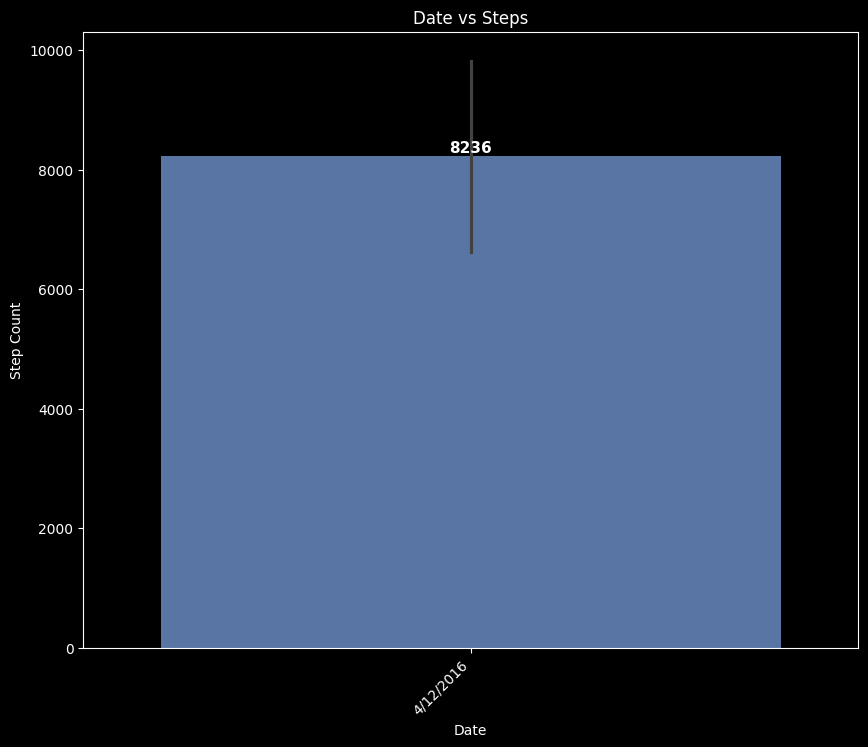

In [63]:
# Chart - 1 visualization code
plt.style.use('dark_background')

# Create a bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size
ax = sns.barplot(data=md, x="ActivityDate", y="TotalSteps", hue="ActivityDate", palette="deep", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.xlabel("Date")
plt.ylabel("Step Count")
plt.title("Date vs Steps")
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',
        fontweight='bold'
    )

# Show the plot
plt.show()

Chart - 2

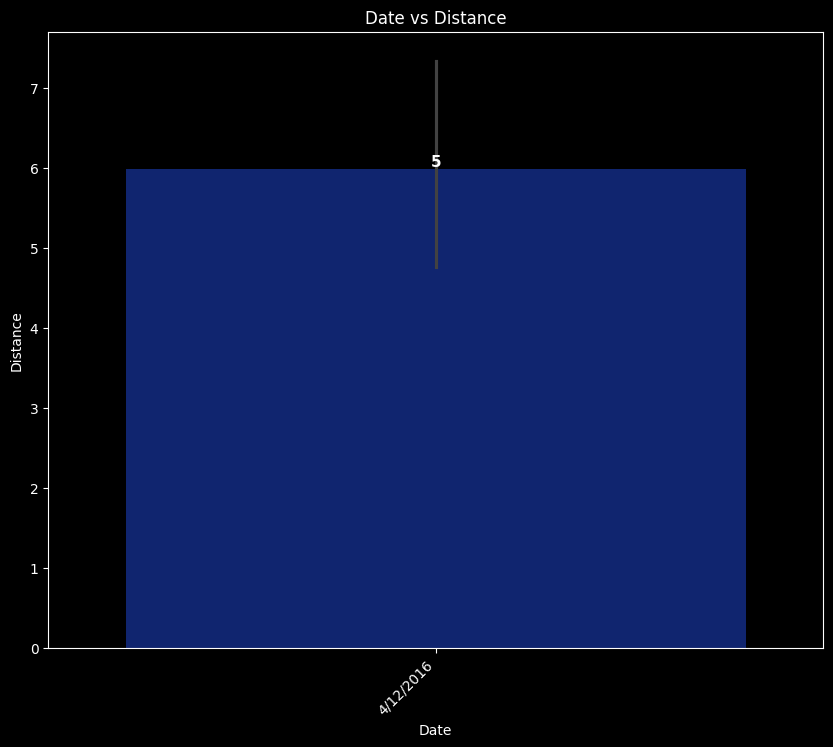

In [64]:
# Chart - 2 visualization code
plt.style.use('dark_background')

# Create a bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size
ax = sns.barplot(data=md, x="ActivityDate", y="TotalDistance", hue="ActivityDate", palette="dark", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.xlabel("Date")
plt.ylabel("Distance")
plt.title("Date vs Distance")
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',
        fontweight='bold'
    )

# Show the plot
plt.show()

Chart - 3

In [65]:
# Chart - 3 visualization code
plt.style.use('dark_background')

md.columns = md.columns.str.strip()

# Count occurrences of each start station
step_count = md["TotalSteps"].value_counts().reset_index()
step_count.columns = ["TotalSteps", "Count"]

# Create the treemap
fig = px.treemap(step_count,
                 path=['TotalSteps'],
                 values='Count',
                 title="Count for Total Steps",
                 color='Count',
                 color_continuous_scale="RdBu")

# Show the plot
fig.show()

Chart - 4

In [66]:
# Chart - 4 visualization code
plt.style.use('dark_background')

md.columns = md.columns.str.strip()

# Count occurrences of each start station
distance_count = md["TotalDistance"].value_counts().reset_index()
distance_count.columns = ["TotalDistance", "Count"]

# Create the treemap
fig = px.treemap(distance_count,
                 path=['TotalDistance'],
                 values='Count',
                 title="Count for Total Distance Covered",
                 color='Count',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})

# Show the plot
fig.show()

Chart - 5

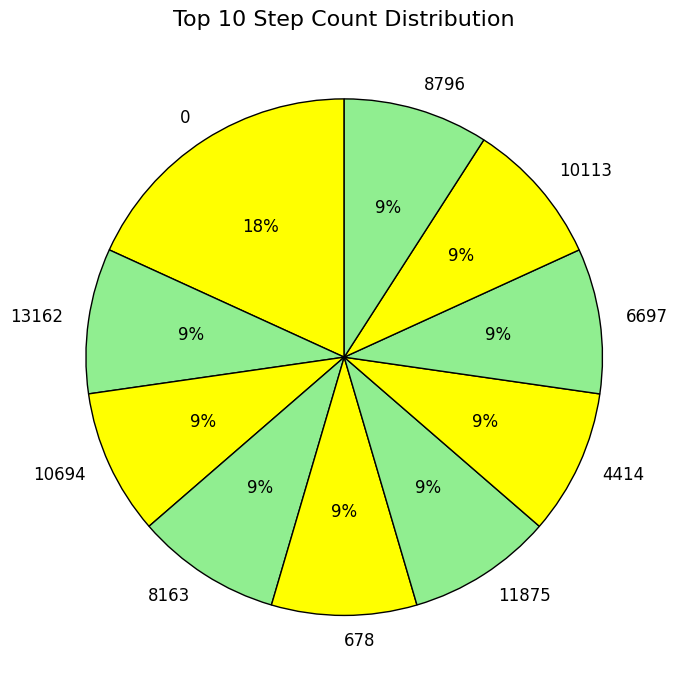

In [67]:
# Chart - 5 visualization code
plt.style.use('default')
md.columns = md.columns.str.strip()

co = md['StepTotal'].value_counts().head(10)
co.index = co.index.astype(int)  # <- make the year labels integers

plt.figure(figsize=(15, 7))
co.plot(
    kind='pie',
    labels=[str(year) for year in co.index],  # <- use labels explicitly
    autopct=lambda p: '{:.0f}%'.format(p),  # whole numbers, no decimal
    colors=['yellow', 'lightgreen'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Top 10 Step Count Distribution', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

Chart - 6

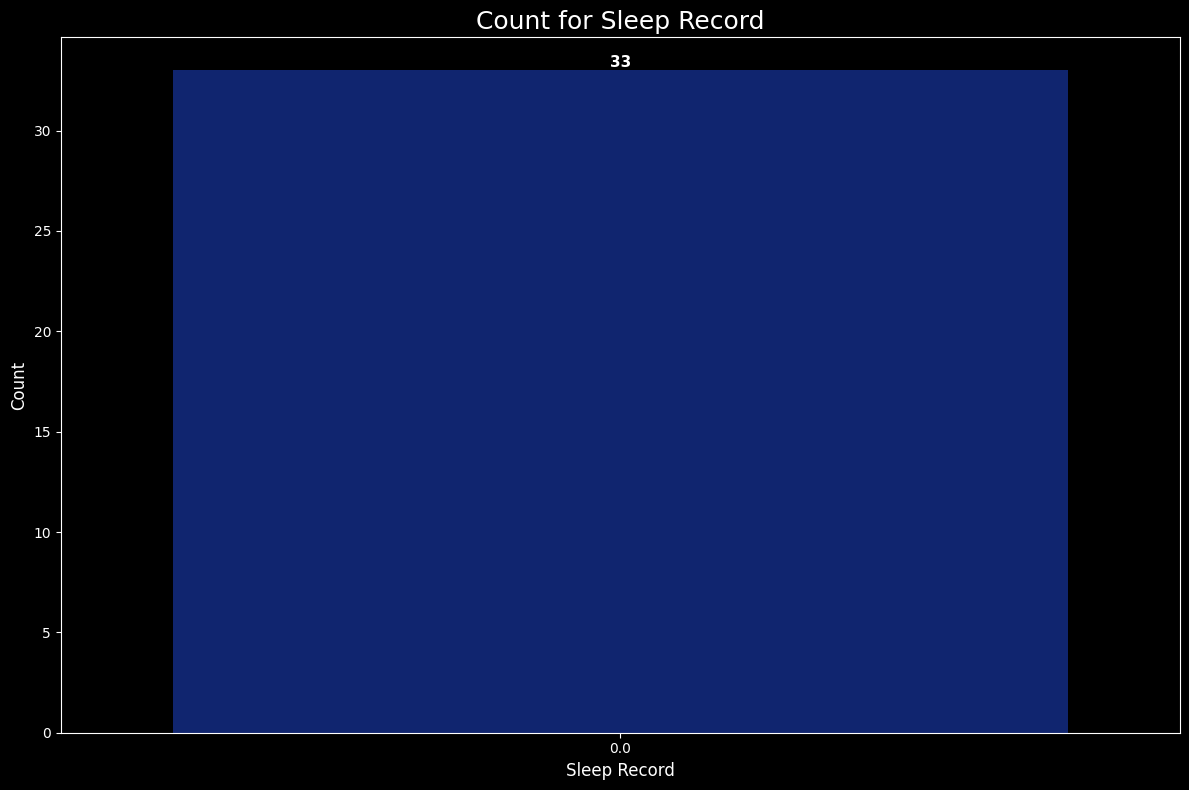

In [68]:
# Chart - 6 visualization code
plt.style.use('dark_background')

md.columns = md.columns.str.strip()
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='TotalSleepRecords', data=md, hue="TotalSleepRecords", palette="dark", legend=0)
plt.title('Count for Sleep Record', fontsize=18)
plt.xlabel('Sleep Record', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',
        fontweight='bold'
    )

plt.grid(False)
plt.tight_layout()
plt.show()

Chart - 7

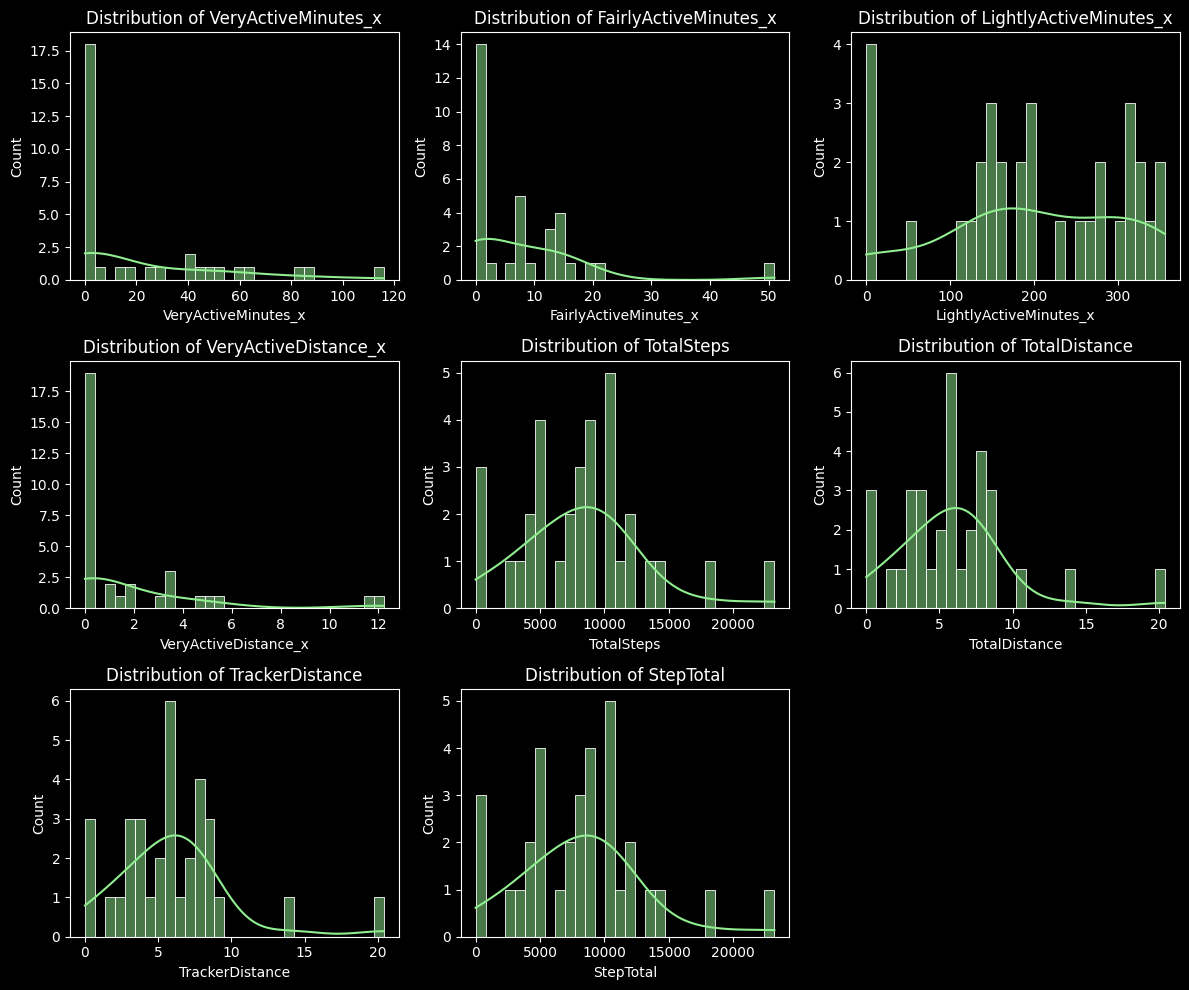

In [69]:
# Chart - 7 visualization code
plt.style.use('dark_background')


numerical_features = ['VeryActiveMinutes_x','FairlyActiveMinutes_x','LightlyActiveMinutes_x','VeryActiveDistance_x',
                     'TotalSteps','TotalDistance','TrackerDistance','StepTotal']

plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(md[column], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribution of {column}', color='white')
    plt.xlabel(column, color='white')
    plt.ylabel('Count', color='white')


    plt.grid(False)

plt.tight_layout()
plt.show()

Chart - 8

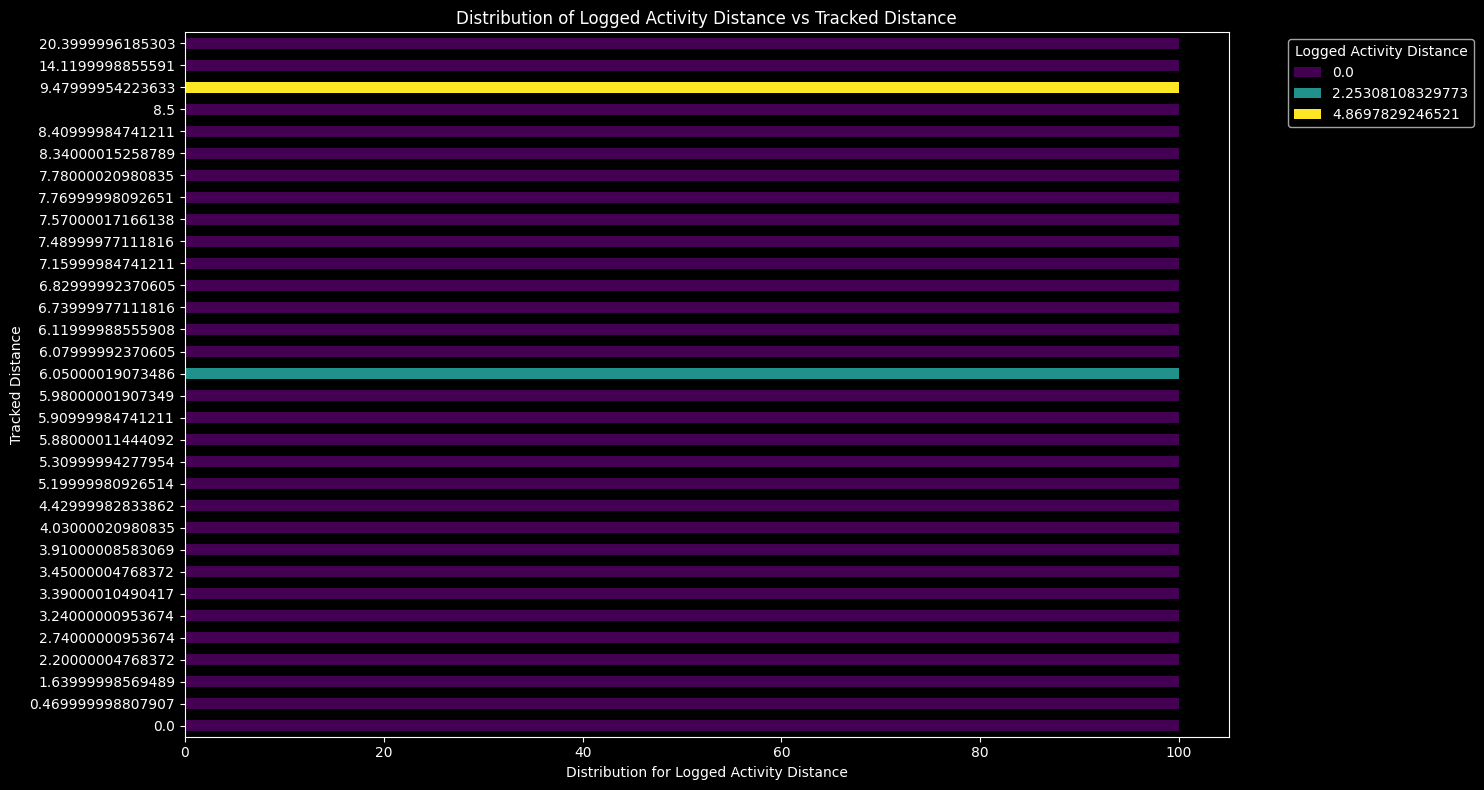

In [70]:
# Chart - 8 visualization code
data = md.groupby(["TrackerDistance", "LoggedActivitiesDistance"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
data_1 = data.div(data.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size
data_1.plot(kind="barh", stacked=True, colormap="viridis", ax=ax)

# Labels and title
plt.xlabel("Distribution for Logged Activity Distance")
plt.ylabel("Tracked Distance")
plt.title("Distribution of Logged Activity Distance vs Tracked Distance")
plt.legend(title="Logged Activity Distance", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Chart - 9

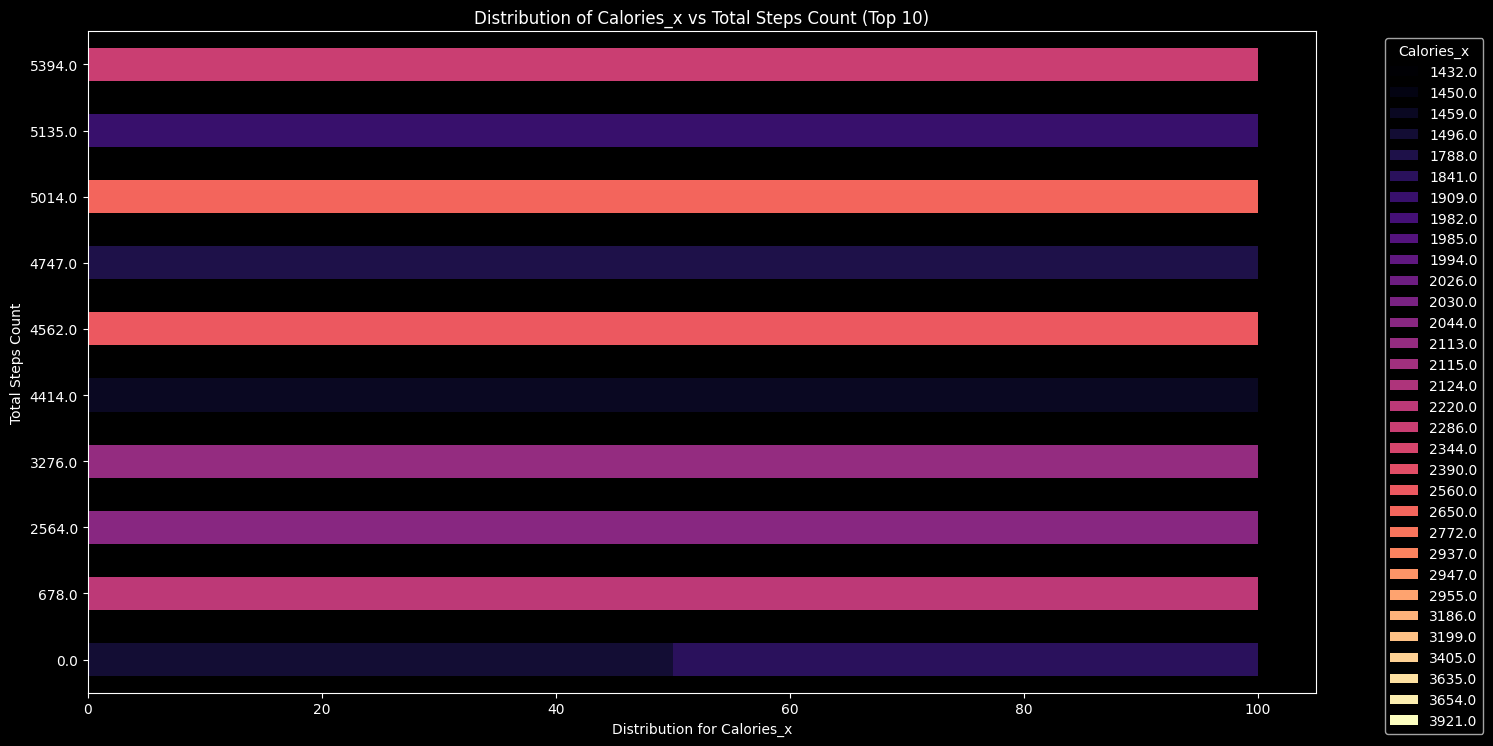

In [71]:
# Chart - 9 visualization code
plt.style.use('dark_background')

data_cx = md.groupby(["TotalSteps", "Calories_x"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
data_cx1 = data_cx.div(data_cx.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all user types per station)
TotalSteps_1 = data_cx.sum(axis=1).sort_values(ascending=False).head(10).index
TotalSteps_cx = data_cx1.loc[TotalSteps_1]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size
TotalSteps_cx.plot(kind="barh", stacked=True, colormap="magma", ax=ax)

# Labels and title
plt.xlabel("Distribution for Calories_x")
plt.ylabel("Total Steps Count")
plt.title("Distribution of Calories_x vs Total Steps Count (Top 10)")
plt.legend(title="Calories_x", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Chart - 10

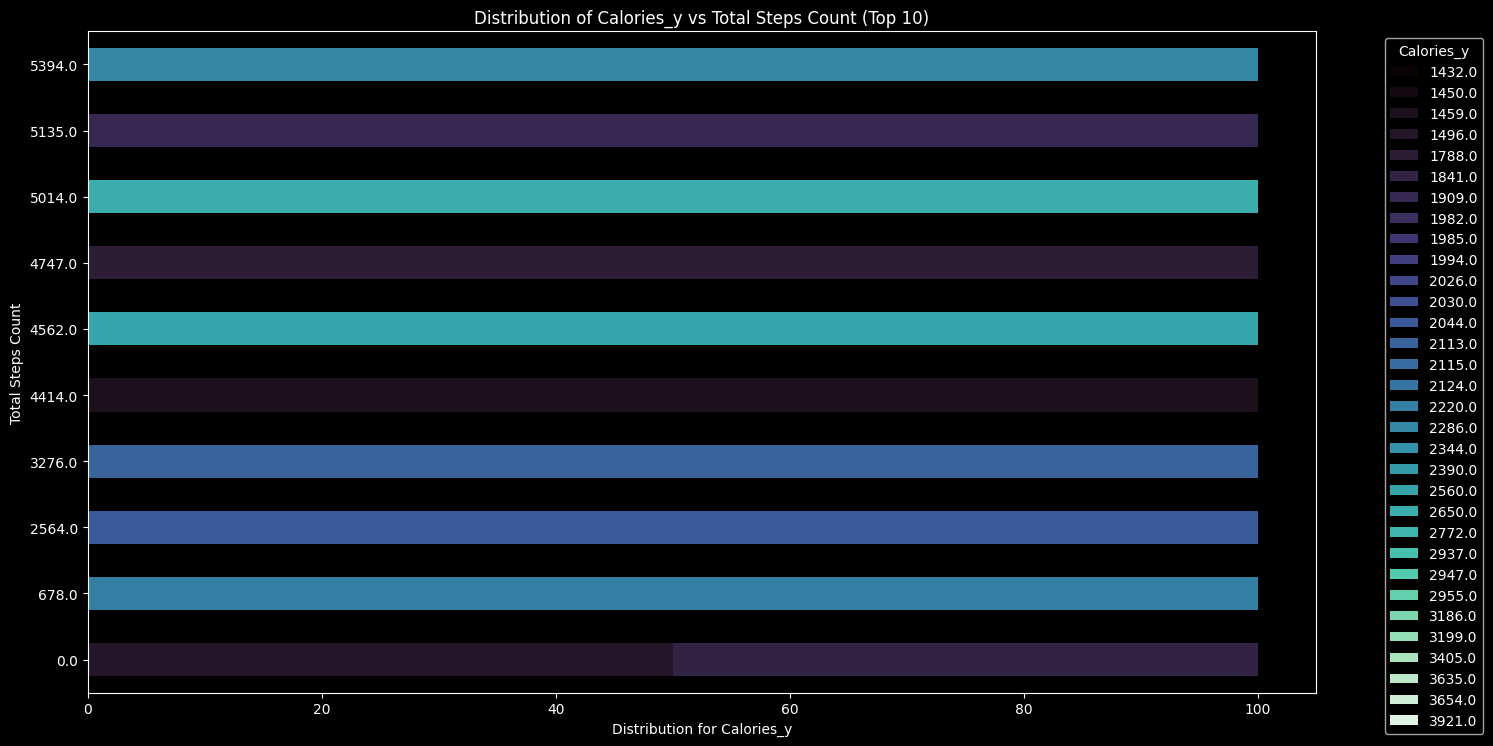

In [72]:
# Chart - 10 visualization code
plt.style.use('dark_background')

data_cy = md.groupby(["TotalSteps", "Calories_y"]).size().unstack(fill_value=0)

# Normalize the data (percentage distribution)
data_cy1 = data_cy.div(data_cy.sum(axis=1), axis=0) * 100

# Select top 20 stations by total trip count (sum of all user types per station)
TotalSteps_2 = data_cy.sum(axis=1).sort_values(ascending=False).head(10).index
TotalSteps_cy = data_cy1.loc[TotalSteps_2]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjusted figure size
TotalSteps_cy.plot(kind="barh", stacked=True, colormap="mako", ax=ax)

# Labels and title
plt.xlabel("Distribution for Calories_y")
plt.ylabel("Total Steps Count")
plt.title("Distribution of Calories_y vs Total Steps Count (Top 10)")
plt.legend(title="Calories_y", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Chart - 11

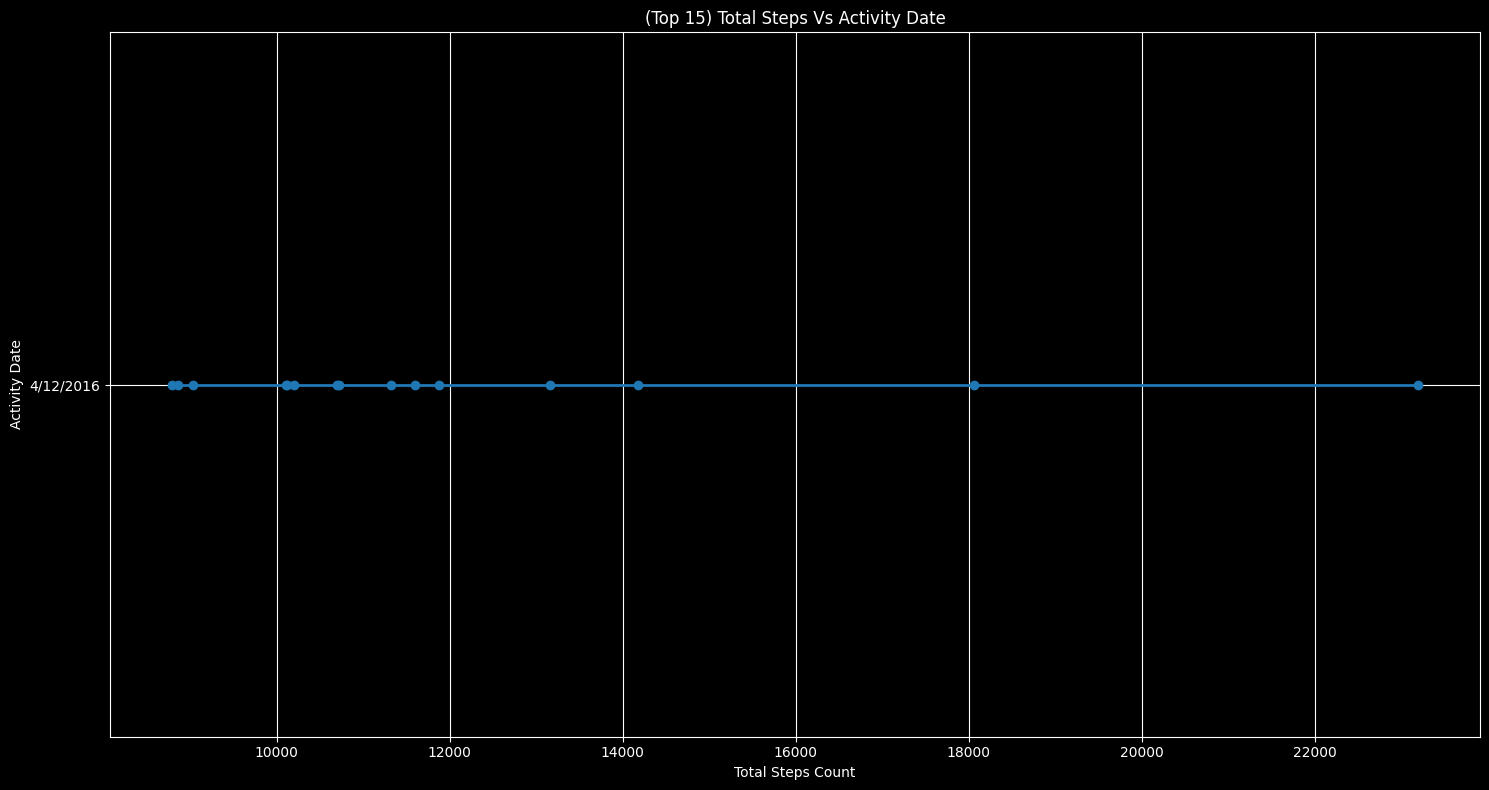

In [73]:
# Chart - 11 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_date_added = md[['TotalSteps', 'ActivityDate']].sort_values(by='TotalSteps', ascending=False).head(15)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_date_added['TotalSteps'], top_date_added['ActivityDate'], marker="o", color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel("Total Steps Count")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Steps Vs Activity Date")
plt.grid(True)
plt.tight_layout()
plt.show()

Chart - 12

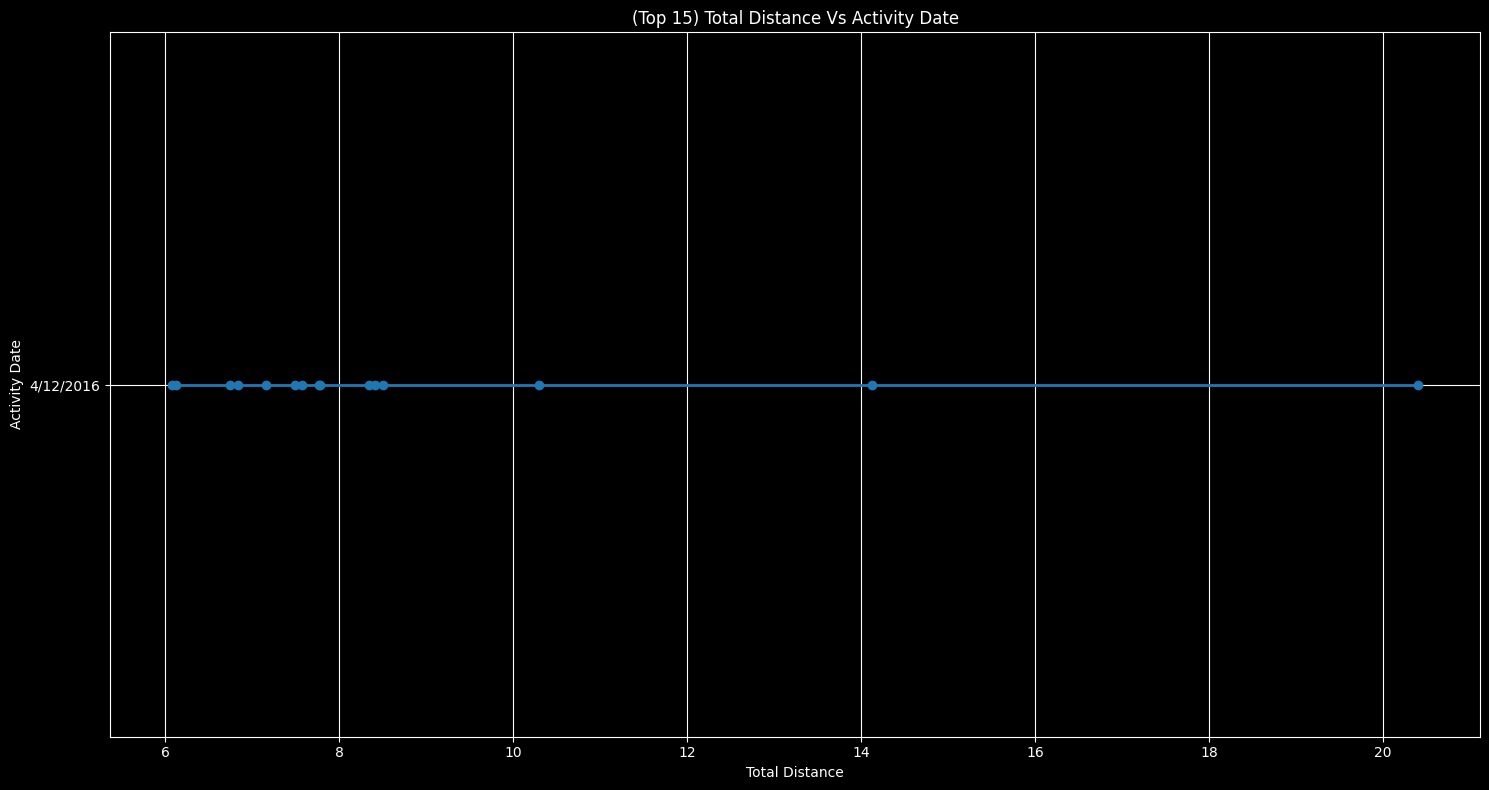

In [74]:
# Chart - 12 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_distance = md[['TotalDistance', 'ActivityDate']].sort_values(by='TotalDistance', ascending=False).head(15)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_distance['TotalDistance'], top_distance['ActivityDate'], marker="o", color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel("Total Distance")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Distance Vs Activity Date")
plt.grid(True)
plt.tight_layout()
plt.show()

Chart - 13

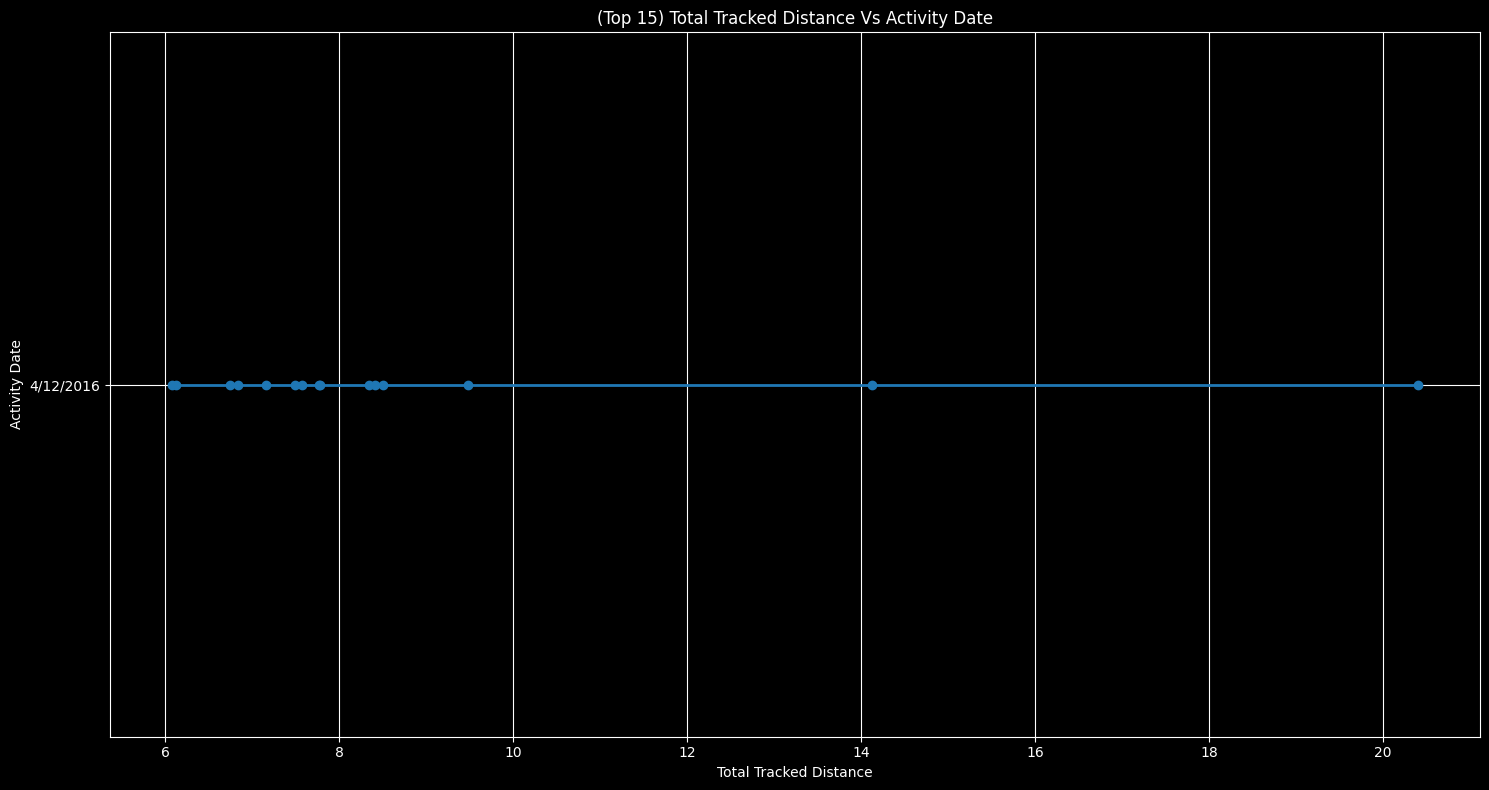

In [75]:
# Chart - 13 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
md.columns = md.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_tracked = md[['TrackerDistance', 'ActivityDate']].sort_values(by='TrackerDistance', ascending=False).head(15)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_tracked['TrackerDistance'], top_tracked['ActivityDate'], marker="o", color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel("Total Tracked Distance")
plt.ylabel("Activity Date")
plt.title("(Top 15) Total Tracked Distance Vs Activity Date")
plt.grid(True)
plt.tight_layout()
plt.show()

Chart - 14 - Correlation Heatmap

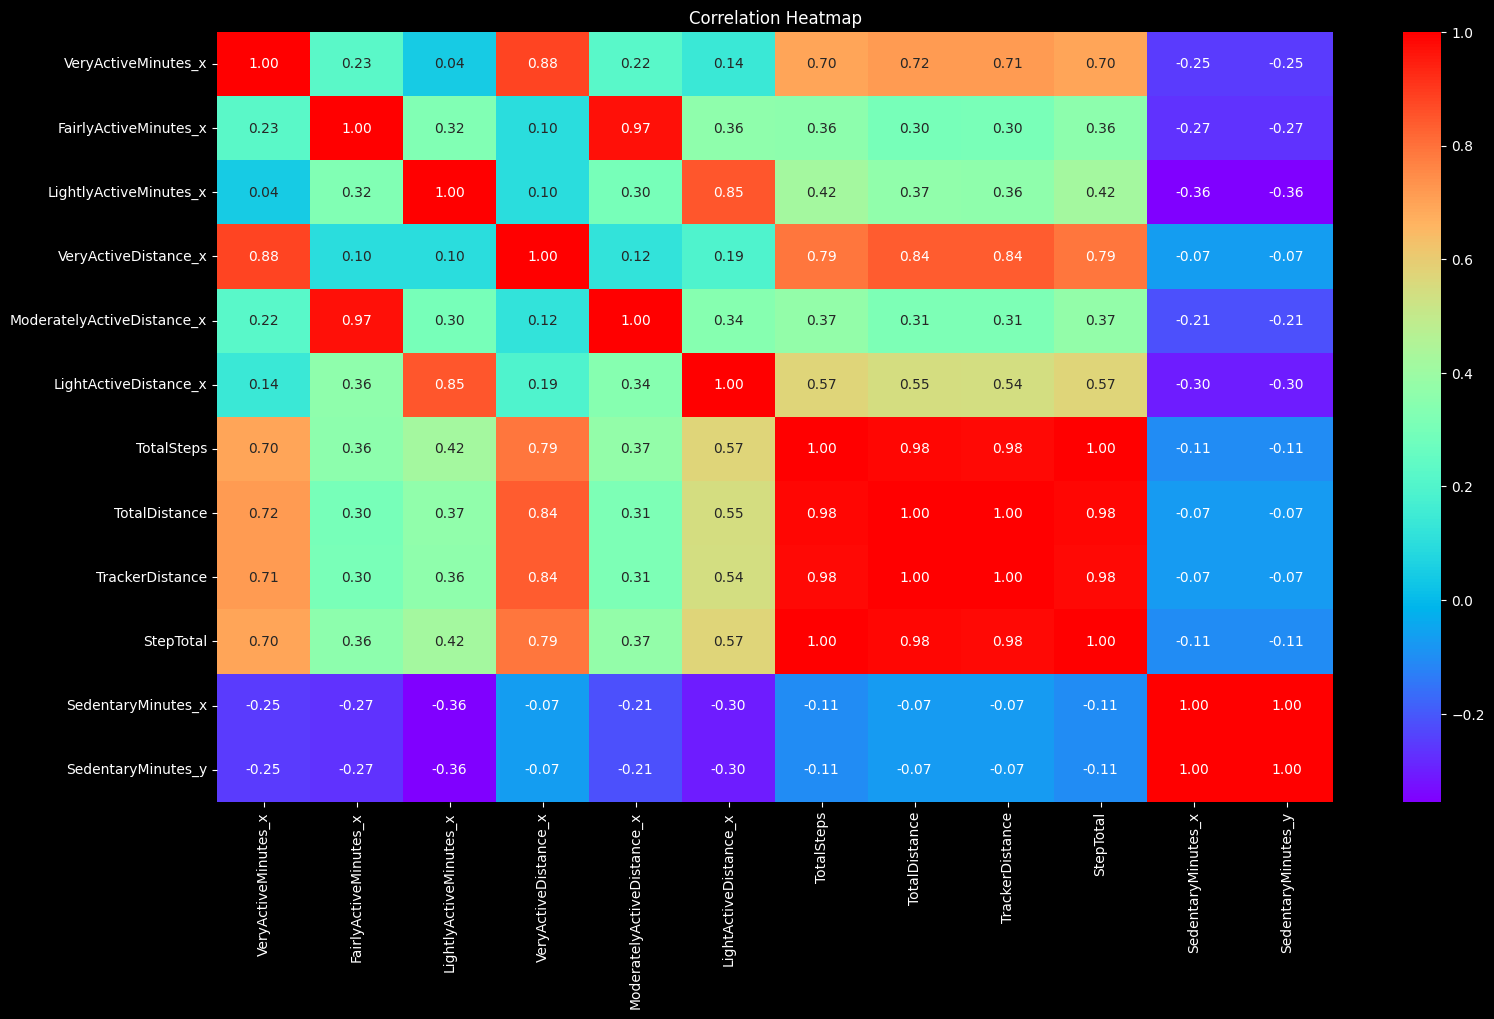

In [76]:
# Correlation Heatmap visualization code
columns_to_include = [
    'VeryActiveMinutes_x','FairlyActiveMinutes_x','LightlyActiveMinutes_x','VeryActiveDistance_x',
    'ModeratelyActiveDistance_x','LightActiveDistance_x','TotalSteps','TotalDistance','TrackerDistance',
    'StepTotal','SedentaryMinutes_x','SedentaryMinutes_y']

# Filter the DataFrame using column names
md2 = md[columns_to_include]

# Compute the correlation matrix
md3 = md2.corr()

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(md3, annot=True, cmap="rainbow", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Chart - 15 - Pair Plot

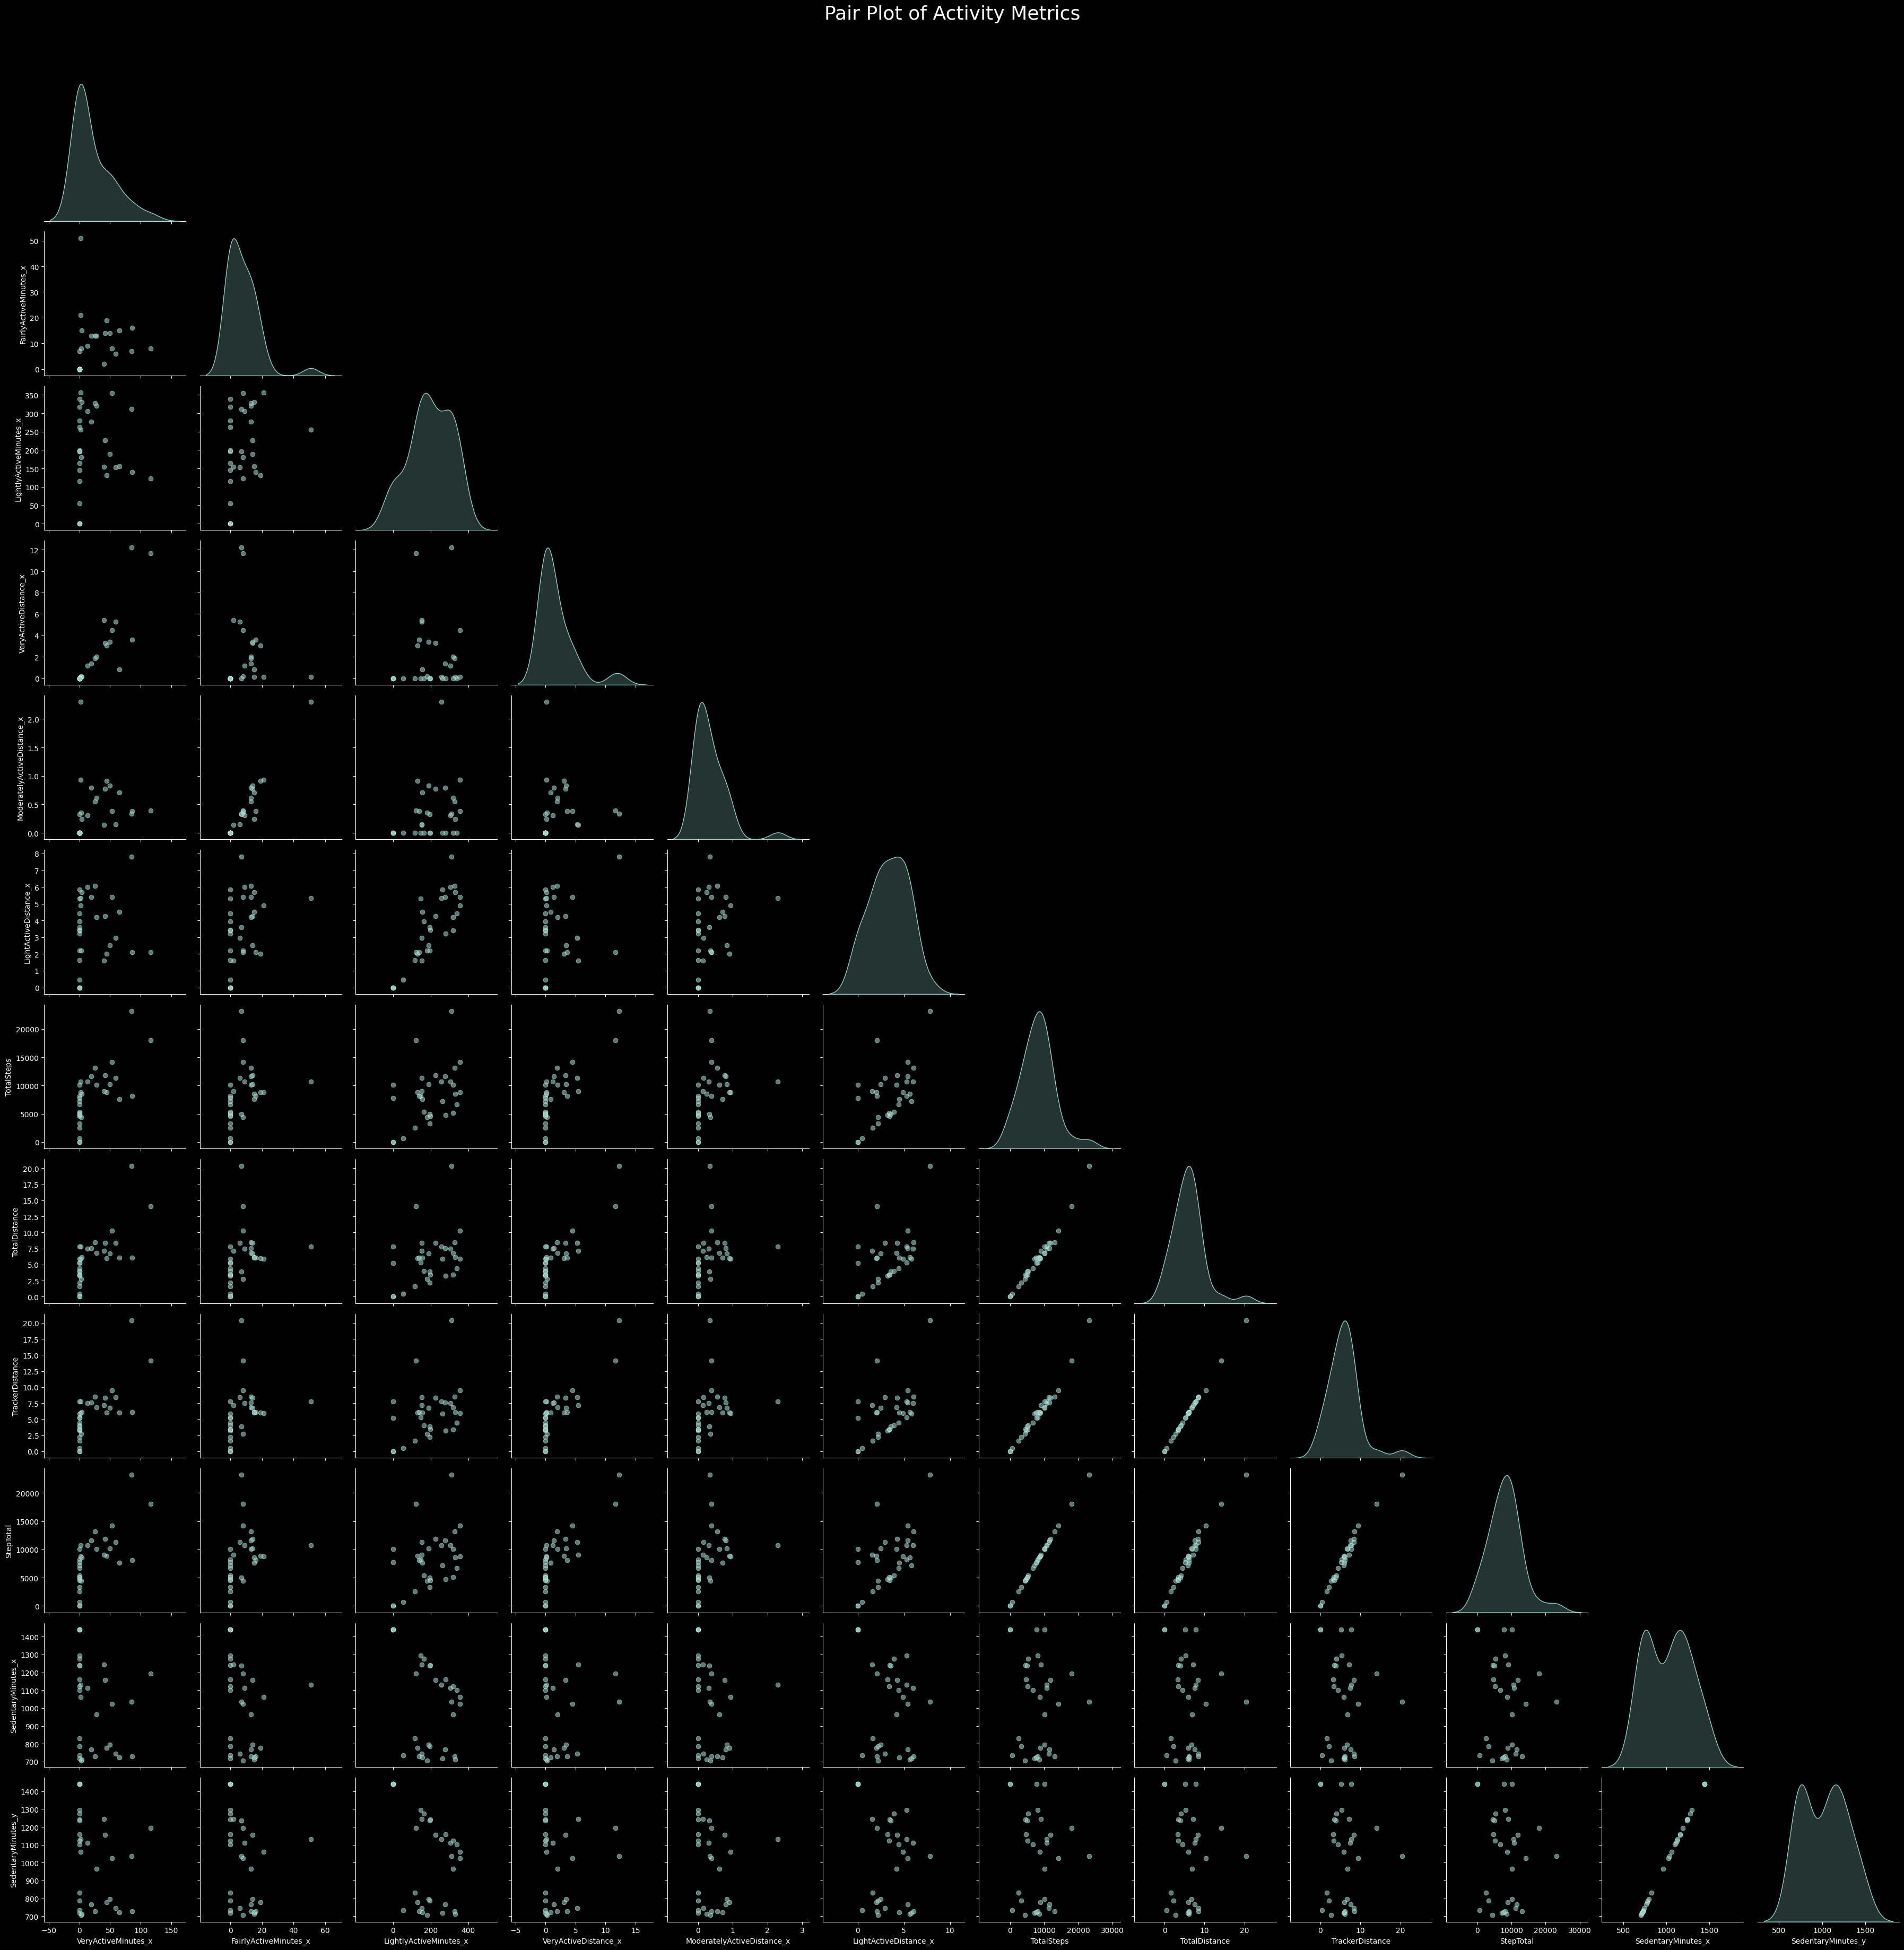

In [77]:
# Pair Plot visualization code
columns_to_include = [
    'VeryActiveMinutes_x','FairlyActiveMinutes_x','LightlyActiveMinutes_x','VeryActiveDistance_x',
    'ModeratelyActiveDistance_x','LightActiveDistance_x','TotalSteps','TotalDistance','TrackerDistance',
    'StepTotal','SedentaryMinutes_x','SedentaryMinutes_y'
]

# Filter the DataFrame using selected columns
md2 = md[columns_to_include]

# Plot the pair plot with controlled figure size (approx 4 plots per row)
sns.pairplot(md2,
             corner=True,
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 40},
             height=3,     # Height of each subplot
             aspect=1)     # Width = height × aspect ratio

plt.suptitle("Pair Plot of Activity Metrics", y=1.02, fontsize=26)
plt.tight_layout()
plt.show()

# **5. Solution to Business Objective**

What do you suggest the client to achieve Business Objective ?

The following are the suggestions for the business to improve and achieve their targets and solve business problems:-

The strava app can encourage people to track their distance as people are completing lot of steps per day but not logging in or tracking distance on app which ultimately will not generate fair manual report at the end of month.
Strava app can organize campaigns, seminars, webinars or rewarding system to encourage people join their app to achieve fitness targets, which ultimately will make people fit as well as increase profits for app.
Strava app can make a system if certain level of target is achieved by the user the user will get offer or discount on paid membership/ subscription, this will encourage people to stay fit and health and also help strava app to gain those extra premium users, ultimately increasing profits for the company.

# **Conclusion**

The following are the conclusion for the above analysis:-

There are 1004 rows and 6 duplicate rows.
There are 39 columns.
Removed 6 duplicate rows.
Replaced all the missing values in the columns with numerical value 0.
The Count total steps for the activity date is 8236.
The count of distance is 5 KM for the activity date.
Maximum Step count distribution is for ID 0 with 18% distribution.
Second highest is for ID 14172 with 9% distribution.
Count for sleep record is 33.
The highest correlation is between Total distance and Total steps with value of 0.98.
Second highest correlation is between moderately active distance _x and Fairly active minutes _x with value of 0.97.
Third highest correlation is between Very active distance _x and very active minutes_x with value of 0.88.
The above are summary or concluding points for the above data analysis.